# Multiclass Sentiment Prediction Baseline Model -- BERT

This notebook demonstrates a multiclass sentiment classification task using a BERT-based model. The objective is to classify news headlines into multiple sentiment categories. It covers the following steps:

1. **Data Preparation:** Loading and exploring the dataset, ensuring we understand the distribution of sentiment classes.
2. **Label Encoding:** Converting textual sentiment labels into integer-encoded classes suitable for model training.
3. **BERT Tokenization:** Leveraging `BertTokenizer` to preprocess and convert the headlines into sequences of input IDs and attention masks.
4. **Model Definition:** Setting up a `TFBertForSequenceClassification` model for multiclass sentiment prediction.
5. **Training and Validation:** Training the BERT model on the prepared data, applying validation, and evaluating performance metrics.

## Requirements
Before running this notebook, ensure the following packages are installed and available in your environment:
- `transformers`
- `torch`
- `tensorflow`
- `scikit-learn`
- `matplotlib`

---

## **1. Importing required libraries for BERT and machine learning tasks**

In [1]:
import pandas as pd
import numpy as np
import os

# Importing required libraries for BERT and machine learning tasks
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

## **2. Data Preparation**
In this section, we load the dataset from the specified path and display a sample of the data. This provides an initial understanding of the input text and associated sentiment labels.

In [2]:
# Mount Google Drive to access data
from google.colab import drive
import os
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Path to the dataset
CSV_path = '/content/drive/MyDrive/DATASCI-266_FinalProject/combined_VERY_VERY_FINAL.csv'
# Load the dataset
df = pd.read_csv(CSV_path)

In [4]:
df.head()

,news_org,title,summary,total_reactions,article_screenshot_s3_link,reactions_screenshot_s3_link,article_sc_date,reactions_sc_date,total_comments,total_shares,...,ratio_angry,ratio_care,cleaned_title,cleaned_summary,vader_sentiment_score,embedding,vader_sentiment_class,sentiment_score,headline_sentiment_class,news_label
0,The_Wall_Street_Journal,Would You Zap Yourself With Electricity to Get...,One of the latest trends in boutique fitness i...,27,https://nlp-project-screenshots.s3.amazonaws.c...,https://nlp-project-screenshots.s3.amazonaws.c...,2024-10-14 16:07:51,2024-10-14 16:07:55,4,3,...,0.037037,0.000000,would zap electricity get shape,one late trend boutique fitness electrify lite...,-0.1027,[-9.65170786e-02 -6.67401850e-02 2.26862580e-...,1,-0.011845,1,0
1,The_Wall_Street_Journal,Tesla Considers $775 Million Texas Factory Exp...,Tesla is considering more than $775 million in...,108,https://nlp-project-screenshots.s3.amazonaws.c...,https://nlp-project-screenshots.s3.amazonaws.c...,2024-10-14 16:08:00,2024-10-14 16:08:05,15,3,...,0.009259,0.009259,tesla considers million texas factory expansion,tesla consider million expansion electricvehic...,-0.4215,[-3.15038592e-01 8.39137062e-02 2.63236046e-...,1,0.005470,2,1
2,The_Wall_Street_Journal,Steven Spielberg’s ‘The Fabelmans’ Wins Best D...,"“The Fabelmans,” Steven Spielberg’s tale of a ...",184,https://nlp-project-screenshots.s3.amazonaws.c...,https://nlp-project-screenshots.s3.amazonaws.c...,2024-10-14 16:08:24,2024-10-14 16:08:28,83,4,...,0.005435,0.010870,steven spielberg fabelmans win best drama,fabelmans steven spielberg tale childhood indo...,0.8402,[-5.72552562e-01 1.90420046e-01 2.98330992e-...,3,0.012617,2,1
3,The_Wall_Street_Journal,Abbott Elementary' Is a Golden Globes Favorite,Abbott Elementary' won three awards at the Gol...,273,https://nlp-project-screenshots.s3.amazonaws.c...,https://nlp-project-screenshots.s3.amazonaws.c...,2024-10-14 16:08:33,2024-10-14 16:08:38,38,6,...,0.003663,0.007326,abbott elementary golden globe favorite,abbott elementary three award golden globe inc...,0.4588,[-6.08102679e-01 -1.03185527e-01 1.87640250e-...,2,0.093773,2,1
4,The_Wall_Street_Journal,An Absent Cate Blanchett Wins Best Actress in ...,Cate Blanchett proved herself a movie maestro ...,263,https://nlp-project-screenshots.s3.amazonaws.c...,https://nlp-project-screenshots.s3.amazonaws.c...,2024-10-14 16:08:45,2024-10-14 16:08:53,7,10,...,0.003802,0.007605,absent cate blanchett win best actress motion ...,cate blanchett prove movie maestro tr earn bes...,0.8402,[-7.72164404e-01 1.47608727e-01 -2.20909327e-...,3,0.063339,2,1


## **3. Check Sentiment Distribution**
Reviewing the distribution of classes helps understand class balance before proceeding with label encoding.

In [ ]:
# Check distribution of sentiment classes
df['headline_sentiment_class'].value_counts()

,count
headline_sentiment_class,
1,2470
2,2261
0,1586
3,305


## **4. Label Encoding**
Before training a multiclass model, we need to understand and potentially encode the different sentiment classes.

In [5]:
# Filter the dataset by sentiment classes and print class distributions
class_0_df_full = df[df['headline_sentiment_class'] == 0]
class_1_df_full = df[df['headline_sentiment_class'] == 1]
class_2_df_full = df[df['headline_sentiment_class'] == 2]
class_3_df_full = df[df['headline_sentiment_class'] == 3]
print("Total class 0 news: ", len(class_0_df_full))
print("Total class 1 news: ", len(class_1_df_full))
print("Total class 2 news: ", len(class_2_df_full))
print("Total class 3 news: ", len(class_3_df_full))


Total class 0 news:  1586
Total class 1 news:  2470
Total class 2 news:  2261
Total class 3 news:  305


## **5. Splitting Data into Features and Labels**
Here, we separate the headlines (features) and their corresponding sentiment classes (labels) to prepare them for tokenization and modeling.
Because the Class 3 is highly inbalanced, we use a Random samples to upsample this class.
We then separate the dataset into training (60%), validation (20%) and testing (20%) sets.

In [6]:
# Separate features (headlines) and labels (sentiment classes)
X = df['title']
y = df['headline_sentiment_class']

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(np.array(X_train).reshape(-1, 1), y_train)
X_train_resampled = pd.Series(X_train_resampled.flatten())
X_train = X_train_resampled
y_train = y_train_resampled # Update y_train with resampled labels

# Now you have X_train, y_train, X_val, y_val, X_test, and y_test
# with balanced classes and the desired split
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (5992,), (5992,)
Validation data shape: (1324,), (1324,)
Testing data shape: (1325,), (1325,)


In [7]:
print('Class counts in y_train: ', y_train.value_counts())
print('Class counts in y_val: ', y_val.value_counts())
print('Class counts in y_test: ', y_test.value_counts())

Class counts in y_train:  headline_sentiment_class
0    1498
2    1498
1    1498
3    1498
Name: count, dtype: int64
Class counts in y_val:  headline_sentiment_class
1    498
2    457
0    315
3     54
Name: count, dtype: int64
Class counts in y_test:  headline_sentiment_class
2    496
1    474
0    283
3     72
Name: count, dtype: int64


## **6. BERT Tokenization and Model Preparation**
Next, we encode the labels and tokenize the text data using `BertTokenizer`. We then define and compile a `TFBertForSequenceClassification` model configured for multiclass output.

In [8]:
# Import libraries for BERT and TensorFlow
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder

# Encode the multiclass labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert text labels to integer-encoded
y_val = label_encoder.transform(y_val)

# Convert to tensors
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)

# Define tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Tokenize the training and validation data
train_encodings = tokenizer(
    list(X_train),  # Convert pandas Series to a list
    padding=True,
    truncation=True,
    max_length=128,  # Limit the maximum sequence length to 128 tokens
    return_tensors='tf'  # Return TensorFlow tensors
)

val_encodings = tokenizer(
    list(X_val),  # Convert pandas Series to a list
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors='tf'
)

# Access the tokenized fields
X_train_input_ids = train_encodings['input_ids']
X_train_attention_mask = train_encodings['attention_mask']

X_val_input_ids = val_encodings['input_ids']
X_val_attention_mask = val_encodings['attention_mask']

# Freeze BERT layers if needed (optional)
bert_model.bert.trainable = False

# Define callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Compile the model
bert_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **7. Training and Validation**

> Add blockquote


We now train the BERT model on the tokenized data and use a validation set to monitor performance. The model's accuracy on the validation set provides insight into its ability to handle the multiclass classification task.

In [ ]:

# Train the model
history = bert_model.fit(
    x={
        'input_ids': X_train_input_ids,
        'attention_mask': X_train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': X_val_input_ids,
            'attention_mask': X_val_attention_mask
        },
        y_val
    ),
    epochs=5,  # You can increase epochs as needed
    batch_size=32
)

Epoch 1/5
188/188 [==============================] - 1481s 8s/step - loss: 1.3606 - accuracy: 0.3204 - val_loss: 1.3106 - val_accuracy: 0.3316
Epoch 2/5
188/188 [==============================] - 1467s 8s/step - loss: 1.3094 - accuracy: 0.3798 - val_loss: 1.2248 - val_accuracy: 0.4041
Epoch 3/5
188/188 [==============================] - 1471s 8s/step - loss: 1.2771 - accuracy: 0.4070 - val_loss: 1.3734 - val_accuracy: 0.3066
Epoch 4/5
188/188 [==============================] - 1484s 8s/step - loss: 1.2527 - accuracy: 0.4236 - val_loss: 1.3739 - val_accuracy: 0.2968
Epoch 5/5
188/188 [==============================] - 1485s 8s/step - loss: 1.2381 - accuracy: 0.4359 - val_loss: 1.2877 - val_accuracy: 0.3640


### **7.1 Save the trained BERT model**

In [ ]:
# Save the trained BERT model
bert_model.save_pretrained('/content/drive/MyDrive/DATASCI-266_FinalProject/baseline_multi_bert_model')

# Save the tokenizer as well
tokenizer.save_pretrained('/content/drive/MyDrive/DATASCI-266_FinalProject/baseline_multi_bert_tokenizer')

print("Model and tokenizer saved successfully.")

Model and tokenizer saved successfully.


### **7.2 Load the Saved Model and Tokenizer**

In [9]:
# Load the saved BERT model
loaded_bert_model = TFBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/DATASCI-266_FinalProject/baseline_multi_bert_model')

# Load the saved tokenizer
loaded_bert_tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/DATASCI-266_FinalProject/baseline_multi_bert_tokenizer')

print("Model and tokenizer loaded successfully.")

Some layers from the model checkpoint at /content/drive/MyDrive/DATASCI-266_FinalProject/baseline_multi_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/DATASCI-266_FinalProject/baseline_multi_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for p

Model and tokenizer loaded successfully.


## **8. Testing the Model**

In [10]:
# Tokenize the testing dataset
test_encodings = loaded_bert_tokenizer(
    list(X_test),  # Convert pandas Series to a list
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors='tf'
)

# Extract tokenized fields
X_test_input_ids = test_encodings['input_ids']
X_test_attention_mask = test_encodings['attention_mask']

# Convert test labels to NumPy array
y_test = np.array(y_test, dtype=np.int32)

loaded_bert_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Evaluate the model on the testing dataset
test_loss, test_accuracy = loaded_bert_model.evaluate(
    x={
        'input_ids': X_test_input_ids,
        'attention_mask': X_test_attention_mask
    },
    y=y_test
)

# Print the test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the testing dataset
predictions = loaded_bert_model.predict(
    x={
        'input_ids': X_test_input_ids,
        'attention_mask': X_test_attention_mask
    }
)

# Convert logits to predicted classes
predicted_classes = np.argmax(predictions.logits, axis=1)

# Display the first 10 predictions and true labels
print("Predicted classes (first 10):", predicted_classes[:10])
print("True labels (first 10):", y_test[:10])

42/42 [==============================] - 351s 8s/step - loss: 1.2745 - accuracy: 0.3864
Test Loss: 1.2745217084884644
Test Accuracy: 0.3864150941371918
42/42 [==============================] - 312s 7s/step
Predicted classes (first 10): [1 0 2 0 2 1 2 0 0 1]
True labels (first 10): [2 2 2 1 1 0 2 0 2 1]


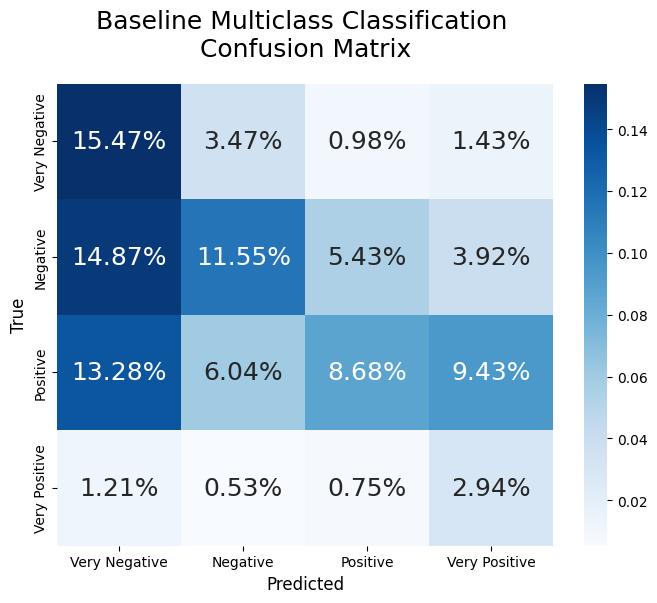

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

path_output_images = '/content/drive/MyDrive/DATASCI-266_FinalProject/Plots/'

# Assign predicted_classes to y_pred
y_pred = predicted_classes

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',

            xticklabels=['Very Negative', 'Negative', 'Positive', 'Very Positive']
            , yticklabels=['Very Negative', 'Negative', 'Positive', 'Very Positive'],
            annot_kws={"size": 18})
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Baseline Multiclass Classification \nConfusion Matrix', size=18,
             pad=20)
plt.savefig(path_output_images + 'plot_CM_Baseline_Multi.png', transparent=True)
plt.show()

In [16]:
# Create a DataFrame to easily access the original text
results_df = pd.DataFrame({'text': X_test, 'true_label': y_test, 'predicted_label': predicted_classes}) # Use predicted_classes instead of y_pred.flatten()

# True Positives (correctly predicted positive)
true_positives = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 1)].head(3)
print("True Positives:")
print(true_positives)

# True Negatives (correctly predicted negative)
true_negatives = results_df[(results_df['true_label'] == 0) & (results_df['predicted_label'] == 0)].head(3)
print("\nTrue Negatives:")
print(true_negatives)

# False Positives (incorrectly predicted positive)
false_positives = results_df[(results_df['true_label'] == 0) & (results_df['predicted_label'] == 1)].head(3)
print("\nFalse Positives:")
print(false_positives)

# False Negatives (incorrectly predicted negative)
false_negatives = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 0)].head(3)
print("\nFalse Negatives:")
false_negatives

True Positives:
                                                   text  true_label  \
2945  GOP Presidential Debate Could Be an Embarrassi...           1   
5050  Lauren Boebert Wants ‘Mercy.’ Some Republicans...           1   
5923  With as little as seven weeks left, GOP races ...           1   

      predicted_label  
2945                1  
5050                1  
5923                1  

True Negatives:
                                                   text  true_label  \
1488  Cody Dorman, who inspired a nation over his bo...           0   
5633  Wheelchair passenger says he had to drag himse...           0   
6375  SCARY SCENE: Eagles star carted off field on s...           0   

      predicted_label  
1488                0  
5633                0  
6375                0  

False Positives:
                                                   text  true_label  \
4240  Alabama mayor's apparent suicide underscores t...           0   
1599  Opinion | Inside the far right's roadma

,text,true_label,predicted_label
4999,City Summons Reporter to Court After He Asked ...,1,0
5497,Watchdog agency increases its pandemic unemplo...,1,0
4379,Coinbase Lays Off Another 20% of its Employees,1,0
